# Reglas de asociación

### Librerías a utilizar:

- ggpubr
- arulesViz

### ¿Qué son las reglas de asociación?

Las reglas de asociación es una herramienta que goza de gran popularidad para la minería de datos en bases de datos, es una técnica de aprendizaje **no supervisado**. La idea es encontrar valores conjuntos para una serie de características $X = (X_1, X_2, X_3, ..., X_p)$ , la meta es encontrar las más frecuentes. Generalmente se utiliza en en datos con representación binaria (1=está y 0= no está) $X_j \in \{0,1\}$, a esto se le suele llamar *market basket* (canasta de mercado), dado que el problema nace desde el problema de encontrar patrones en bases de datos comerciales. 



### ¿Cuándo las utilizo?
- Cuando quiero encontrar un comportamiento repetitivo en base a la asociación de las características del estudio.
- Descubrir un conjunto de hechos en común.
- Se quiere conocer relaciones entre las variables.

### Historia:

> Basado en el concepto de regla fuerte, Agrawal et al.3​ presentaron un trabajo en el que indicaban las reglas de asociación que descubrían las relaciones entre los datos recopilados a gran escala en los sistemas de terminales de punto de venta de unos supermercados (Wikipedia).

Un ejemplo de regla sería:

$$ cebollas, vegetales => carne$$

Con este tipo de regla es posible conocer como se comporta el mercado, por ejemplo podría poner en pasillos cercanos los productos $carne, vegetales$ y $carne$.

### Conceptos very importantes

- Antecedente: Es la parte izquierda de la regla. Indica que relaciones provocan algo.
- Consecuente: Es la parte derecha. Indica la conclusión de la regla.
- Soporte: Es una medida de calidad de la regla. Para una regla $A => B$, el soporte es la fracción de observaciones en la unión del antecedente y consecuente.
$$ sop(X) = \frac{X}{D}$$
Donde $X$ corresponde a las transacciones y $D$ a la base de datos.

- Confianza: Corresponde a otra medida de interés de la regla. Se define como el soporte de la regla dividodo por el soporte del antecedente.
$$ conf(A=>B) = \frac{sop(A => B)}{sop(A)}$$

** Algo así como la probabildiad condicional $P(B|A)$.


- *Lift*: expresa cuál es la proporción del soporte observado de un conjunto de productos respecto del soporte teórico de ese conjunto dado el supuesto de independencia.

    - lift == 1 ? El conjunto aparece una cantidad de veces acorde a lo esperado bajo condiciones de independencia.
    - lift > 1 ? Ese conjunto aparece una cantidad de veces superior a lo esperado bajo condiciones de independencia (por lo que se puede intuir que existe una relación que hace que los productos se encuentren en el conjunto más veces de lo normal)
    - lift < 1 ? Ese conjunto aparece una cantidad de veces inferior a lo esperado bajo condiciones de independencia (por lo que se puede intuir que existe una relación que hace que los productos no estén formando parte del mismo conjunto más veces de lo normal)

$$ lift(A => B) = \frac{conf(A=>B)}{sop(B)}$$

** mide si la regla se debió al azar

> Cuanto más se aleje el valor de lift de 1, más evidencias de que la regla no se debe a un artefacto aleatorio, es decir, mayor la evidencia de que la regla representa un patrón real ([Joaquin_AR](https://rpubs.com/Joaquin_AR/397172))

### Ejemplito textual:

- Se tiene un conjunto $K = \{mantequilla \quad de \quad maní, jalea, pan\}$
- Se tiene una regla *mantequilla de maní*, *jalea* => *pan*
- El soporte de la regla es de 0.03 -> esto significa que los elementos aparecen juntos un 3% en la canasta.
- La confianza de la regla es de 0.82 -> esto significa que el 82% del tiempo que la mantequilla de maní y jalea fueron comprados, también se compró pan.

- Si el pan apareció un 43% del total de canastas, entonces la regla tendría un *lift* de 1.95 ¿qué significa esto?



In [1]:
library("ggpubr")
library("cowplot")

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggpubr’:

    get_legend



### Ejemplo: 
Para el conjunto de datos de [semillas de trigo](https://archive.ics.uci.edu/ml/datasets/seeds) se quiere estudiar reglas de interés que tengan como consecuente la clase.

Recordar que el conjunto de datos a explicar está completamente balanceado (misma cantidad de observaciones por clase) y se tienen 7 características continuas (todas positivas).

In [2]:
columns = c("area", "perimeter", "compactness", "length", "width", "AC", "lengthGroove", "class")
url = "https://www.dl.dropboxusercontent.com/s/wrexlo5im3g5ioi/seeds_dataset.csv"
seeds = read.csv(url, header = F, sep=",", col.names = columns)
seeds$class = factor(seeds$class, levels = c(1,2,3), labels = c("Kama", "Rosa", "Canadian"))

In [3]:
head(seeds)

area,perimeter,compactness,length,width,AC,lengthGroove,class
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama
14.38,14.21,0.8951,5.386,3.312,2.462,4.956,Kama


In [4]:
summary(seeds[seeds$class == "Kama",])

      area         perimeter      compactness         length     
 Min.   :11.23   Min.   :12.63   Min.   :0.8392   Min.   :4.902  
 1st Qu.:13.75   1st Qu.:13.96   1st Qu.:0.8689   1st Qu.:5.385  
 Median :14.36   Median :14.32   Median :0.8805   Median :5.534  
 Mean   :14.33   Mean   :14.29   Mean   :0.8801   Mean   :5.508  
 3rd Qu.:15.04   3rd Qu.:14.73   3rd Qu.:0.8904   3rd Qu.:5.677  
 Max.   :17.08   Max.   :15.46   Max.   :0.9183   Max.   :6.053  
     width             AC          lengthGroove        class   
 Min.   :2.850   Min.   :0.7651   Min.   :4.519   Kama    :70  
 1st Qu.:3.134   1st Qu.:1.8265   1st Qu.:4.925   Rosa    : 0  
 Median :3.244   Median :2.5455   Median :5.094   Canadian: 0  
 Mean   :3.245   Mean   :2.6674   Mean   :5.087                
 3rd Qu.:3.378   3rd Qu.:3.3010   3rd Qu.:5.223                
 Max.   :3.683   Max.   :6.6850   Max.   :5.877                

In [5]:
summary(seeds[seeds$class == "Rosa",])

      area         perimeter      compactness         length     
 Min.   :15.38   Min.   :14.66   Min.   :0.8452   Min.   :5.363  
 1st Qu.:17.33   1st Qu.:15.74   1st Qu.:0.8725   1st Qu.:5.979  
 Median :18.72   Median :16.21   Median :0.8826   Median :6.149  
 Mean   :18.33   Mean   :16.14   Mean   :0.8835   Mean   :6.148  
 3rd Qu.:19.14   3rd Qu.:16.56   3rd Qu.:0.8982   3rd Qu.:6.312  
 Max.   :21.18   Max.   :17.25   Max.   :0.9108   Max.   :6.675  
     width             AC         lengthGroove        class   
 Min.   :3.231   Min.   :1.472   Min.   :5.144   Kama    : 0  
 1st Qu.:3.554   1st Qu.:2.845   1st Qu.:5.878   Rosa    :70  
 Median :3.693   Median :3.610   Median :5.981   Canadian: 0  
 Mean   :3.677   Mean   :3.645   Mean   :6.021                
 3rd Qu.:3.805   3rd Qu.:4.436   3rd Qu.:6.188                
 Max.   :4.033   Max.   :6.682   Max.   :6.550                

In [6]:
summary(seeds[seeds$class == "Canadian",])

      area         perimeter      compactness         length     
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :4.899  
 1st Qu.:11.26   1st Qu.:13.00   1st Qu.:0.8340   1st Qu.:5.136  
 Median :11.84   Median :13.25   Median :0.8494   Median :5.224  
 Mean   :11.87   Mean   :13.25   Mean   :0.8494   Mean   :5.230  
 3rd Qu.:12.43   3rd Qu.:13.47   3rd Qu.:0.8618   3rd Qu.:5.324  
 Max.   :13.37   Max.   :13.95   Max.   :0.8977   Max.   :5.541  
     width             AC         lengthGroove        class   
 Min.   :2.630   Min.   :1.661   Min.   :4.745   Kama    : 0  
 1st Qu.:2.725   1st Qu.:4.049   1st Qu.:5.002   Rosa    : 0  
 Median :2.834   Median :4.839   Median :5.091   Canadian:70  
 Mean   :2.854   Mean   :4.788   Mean   :5.116                
 3rd Qu.:2.967   3rd Qu.:5.467   3rd Qu.:5.229                
 Max.   :3.232   Max.   :8.456   Max.   :5.491                


Al igual que en las experiencias pasadas, para recordar cómo se encuentran las clases en función de sus características, se tiene que:

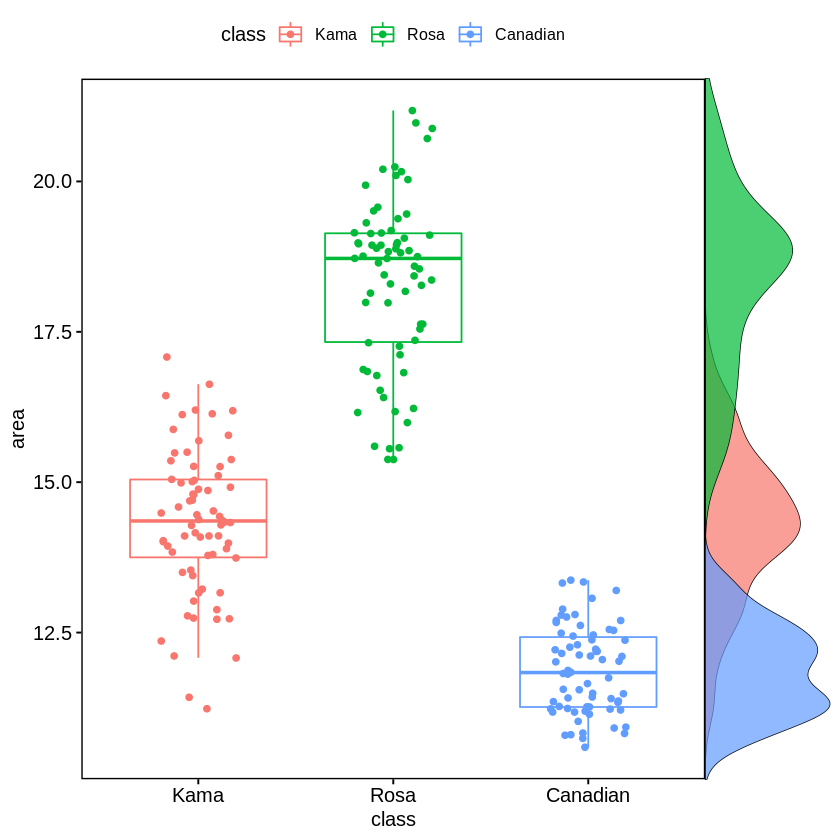

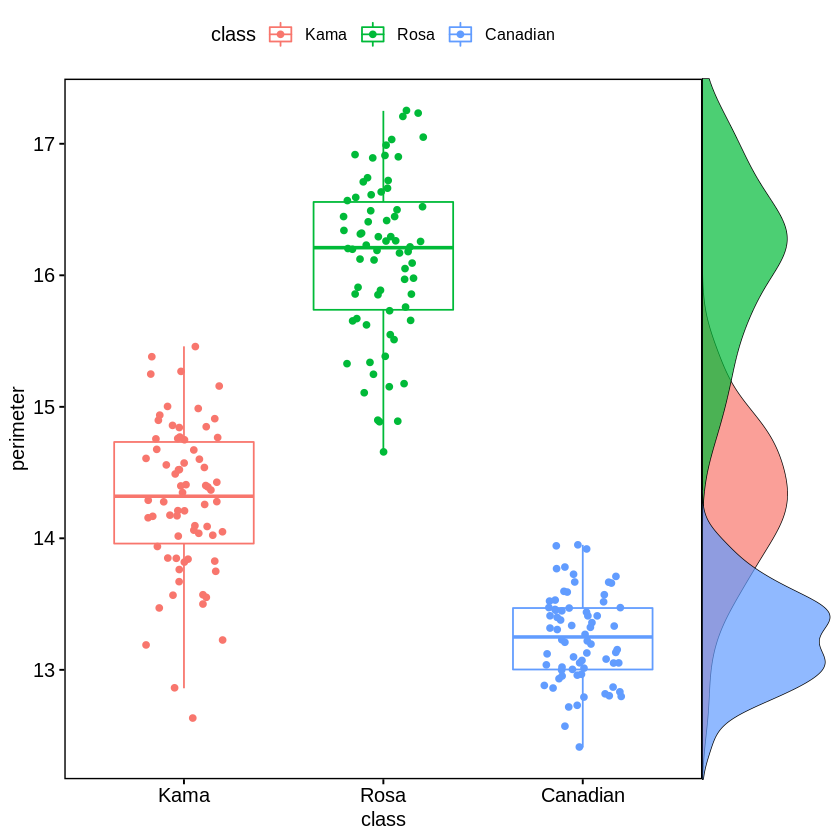

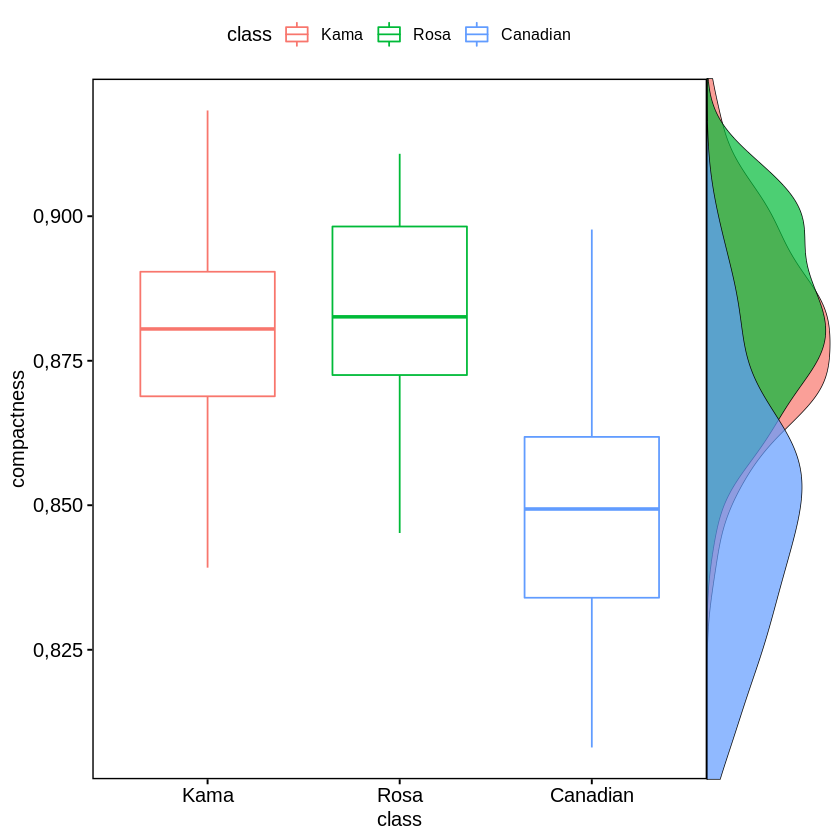

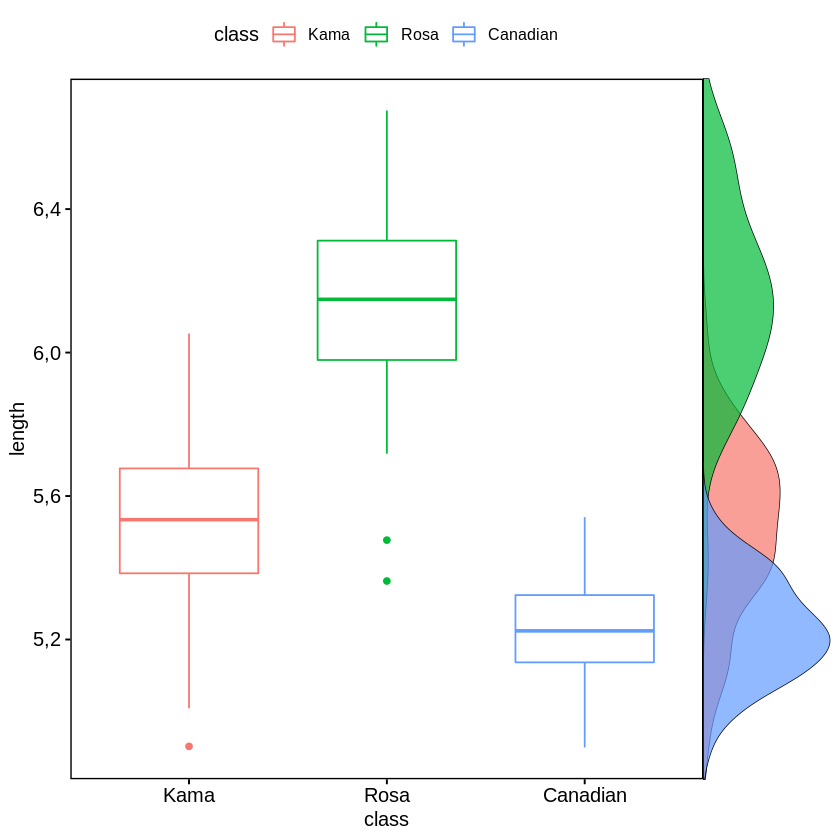

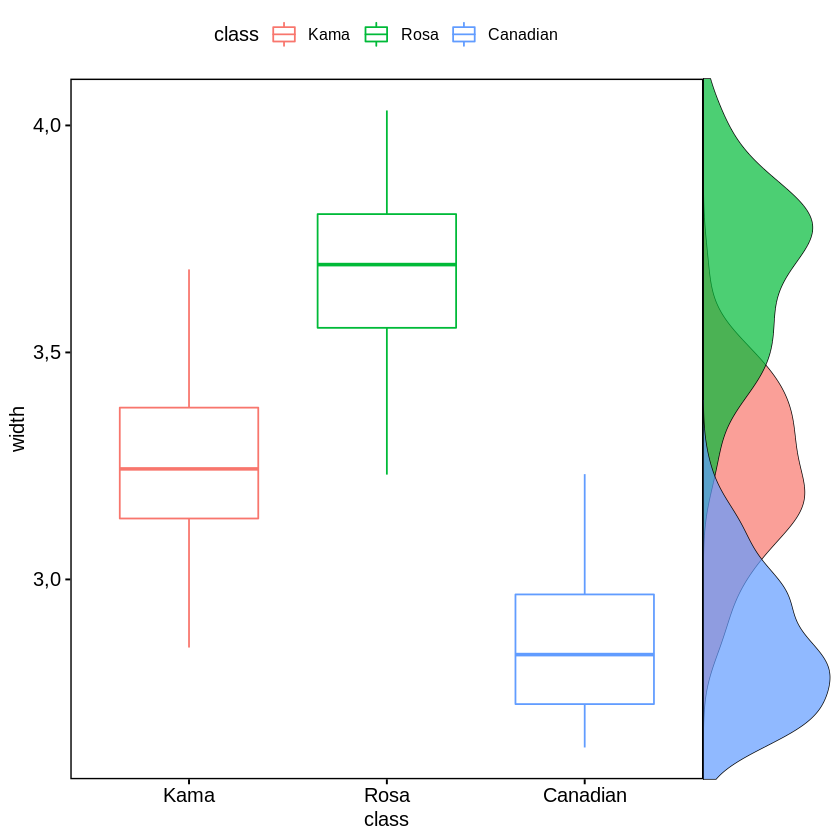

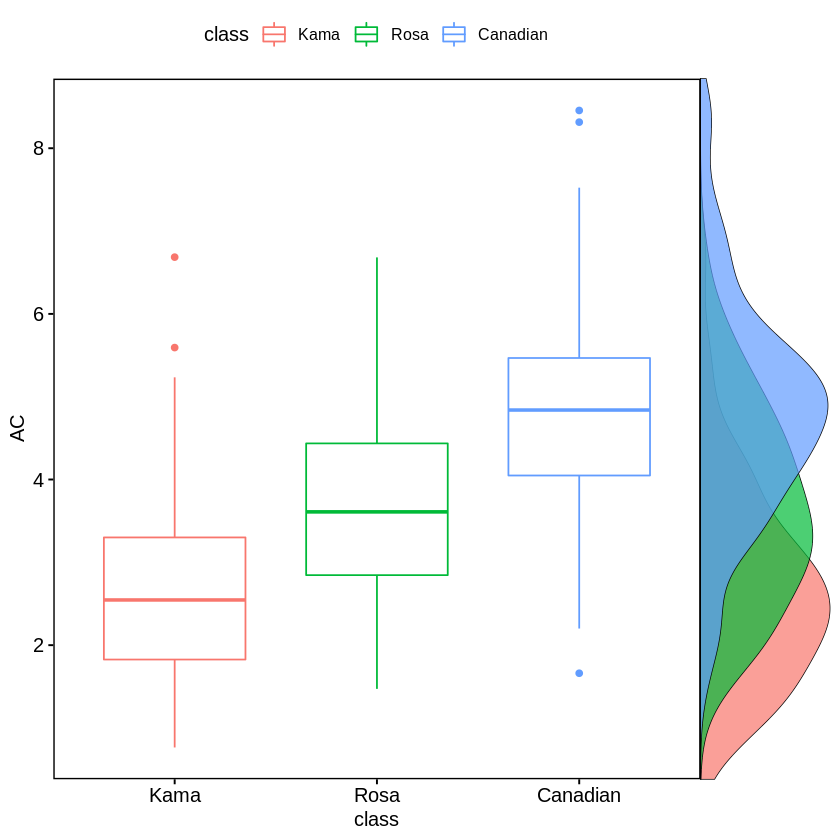

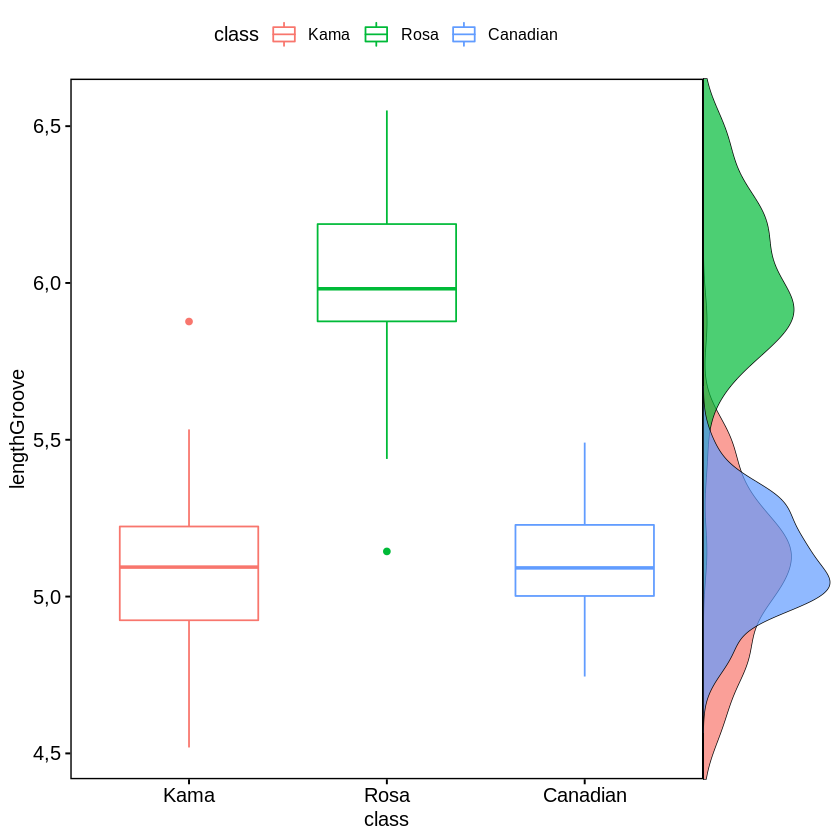

In [7]:
boxplot.area =  ggboxplot(data = seeds, x = "class", y = "area", color = "class", add = "jitter") + border() 
ydens = axis_canvas(boxplot.area, axis = "y", coord_flip = TRUE) + geom_density(data = seeds, aes(x = area, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
boxplot.area = insert_yaxis_grob(boxplot.area, ydens, grid::unit(.2, "null"), position = "right")
ggdraw(boxplot.area)

# perimeter
boxplot.perimeter =  ggboxplot(data = seeds, x = "class", y = "perimeter", color = "class", add= "jitter") + border()
ydens = axis_canvas(boxplot.perimeter, axis = "y", coord_flip = TRUE) + geom_density(data = seeds, aes(x = perimeter, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
boxplot.perimeter = insert_yaxis_grob(boxplot.perimeter, ydens, grid::unit(.2, "null"), position = "right")
ggdraw(boxplot.perimeter)

# compactness
boxplot.compactness =  ggboxplot(data = seeds, x = "class", y = "compactness", color = "class") + border()
ydens = axis_canvas(boxplot.compactness, axis = "y", coord_flip = TRUE) + geom_density(data = seeds, aes(x = compactness, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
boxplot.compactness = insert_yaxis_grob(boxplot.compactness, ydens, grid::unit(.2, "null"), position = "right")
ggdraw(boxplot.compactness)

# length
boxplot.length =  ggboxplot(data = seeds, x = "class", y = "length", color = "class") + border()
ydens = axis_canvas(boxplot.length, axis = "y", coord_flip = TRUE) + geom_density(data = seeds, aes(x = length, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
boxplot.length = insert_yaxis_grob(boxplot.length, ydens, grid::unit(.2, "null"), position = "right")
ggdraw(boxplot.length)

# width
boxplot.width =  ggboxplot(data = seeds, x = "class", y = "width", color = "class") + border()
ydens = axis_canvas(boxplot.width, axis = "y", coord_flip = TRUE) + geom_density(data = seeds, aes(x = width, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
boxplot.width = insert_yaxis_grob(boxplot.width, ydens, grid::unit(.2, "null"), position = "right")
ggdraw(boxplot.width)

# AC
boxplot.AC =  ggboxplot(data = seeds, x = "class", y = "AC", color = "class") + border()
ydens = axis_canvas(boxplot.AC, axis = "y", coord_flip = TRUE) + geom_density(data = seeds, aes(x = AC, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
boxplot.AC = insert_yaxis_grob(boxplot.AC, ydens, grid::unit(.2, "null"), position = "right")
ggdraw(boxplot.AC)

# lengthGroove
boxplot.lengthGroove =  ggboxplot(data = seeds, x = "class", y = "lengthGroove", color = "class") + border()
ydens = axis_canvas(boxplot.lengthGroove, axis = "y", coord_flip = TRUE) + geom_density(data = seeds, aes(x = lengthGroove, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
boxplot.lengthGroove = insert_yaxis_grob(boxplot.lengthGroove, ydens, grid::unit(.2, "null"), position = "right")
ggdraw(boxplot.lengthGroove)

Se logra apreciar que algunas características como el área y perímetro parecen ser un buen discriminador en sus respectivos gráficos. Si vemos como se ve distribuida la clase en estas dos "dimensiones" existe una tendencia. ¿A qué se parece esto? (spoiler: clustering)

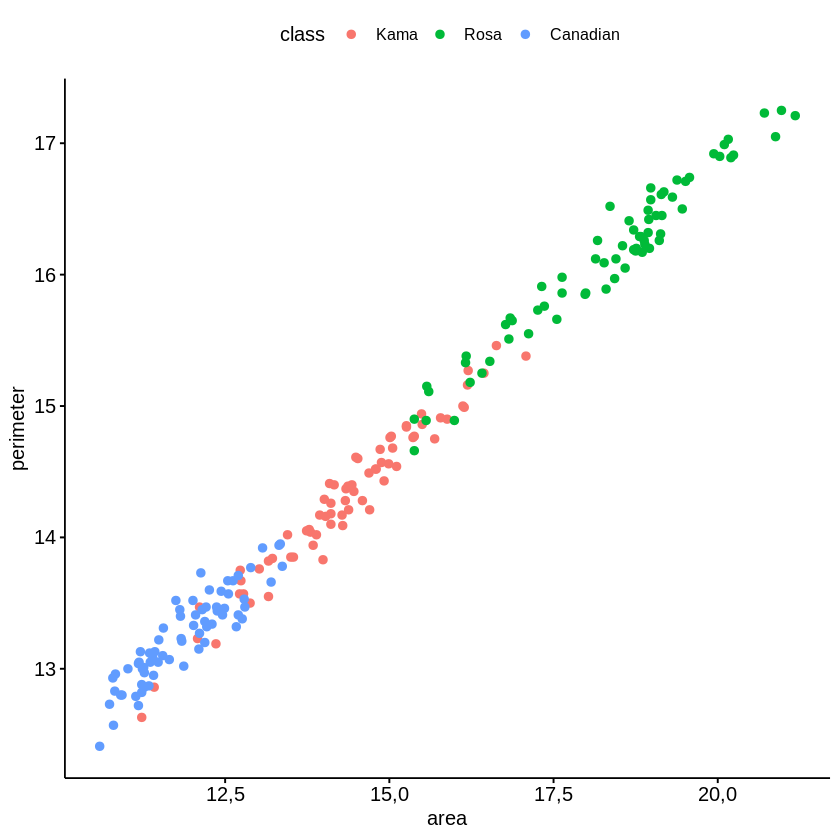

In [8]:
ggscatter(data = seeds, x = "area", y = "perimeter", color = "class")

## Reglas de asosciación en R
Al observar el gráfico anterior podríamos decir a **priori** que la clase Canadian tiene un área pequeña y perímtro pequeño.

Dejando de lado ese precario análisis exploratorio (solo repaso), es hora de ver como se ven las reglas de asosiación en R 😬.

In [9]:
library("arulesViz")

Loading required package: arules
Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write

Loading required package: grid


Primero se debe discretizar los datos a trabajar (para esto deben ver la naturaleza de su problema), en este caso discretizaremos (arbitrariamente) en dos rangos por característica.

In [10]:
seeds.rules = seeds

area = c(-Inf, 14.85, Inf)
area.names = c("Pequeña", "Grande")

perimeter = c(-Inf, 14.56, Inf)
perimeter.names = c("Pequeña", "Grande")

compactness = c(-Inf, 0.8710, Inf)
compactness.names = c("Pequeña", "Grande")

lenght = c(-Inf, 5.629, Inf)
lenght.names = c("Pequeña", "Grande")

width = c(-Inf, 3.259, Inf)
width.names = c("Pequeña", "Grande")

ac = c(-Inf, 3.7002, Inf)
ac.names = c("Pequeña", "Grande")

lg = c(-Inf, 5.408, Inf)
lg.names = c("Pequeña", "Grande")


seeds.rules$area = cut(seeds.rules$area, breaks = area, labels = area.names)
seeds.rules$perimeter = cut(seeds.rules$perimeter, breaks = perimeter, labels = perimeter.names)
seeds.rules$compactness = cut(seeds.rules$compactness, breaks = compactness, labels = compactness.names)
seeds.rules$length = cut(seeds.rules$length, breaks = lenght, labels = lenght.names)
seeds.rules$width = cut(seeds.rules$width, breaks = width, labels = width.names)
seeds.rules$AC = cut(seeds.rules$AC, breaks = ac, labels = ac.names)
seeds.rules$lengthGroove = cut(seeds.rules$lengthGroove, breaks = lg, labels = lg.names)

In [11]:
head(seeds.rules)

area,perimeter,compactness,length,width,AC,lengthGroove,class
Grande,Grande,Pequeña,Grande,Grande,Pequeña,Pequeña,Kama
Grande,Grande,Grande,Pequeña,Grande,Pequeña,Pequeña,Kama
Pequeña,Pequeña,Grande,Pequeña,Grande,Pequeña,Pequeña,Kama
Pequeña,Pequeña,Grande,Pequeña,Grande,Pequeña,Pequeña,Kama
Grande,Grande,Grande,Grande,Grande,Pequeña,Pequeña,Kama
Pequeña,Pequeña,Grande,Pequeña,Grande,Pequeña,Pequeña,Kama


Recordemos el gráfico de dispersión de [área vs perímetro](#Reglas-de-asosciación-en-R), en donde la premisa era que la clase Canadian tenían un área pequeña y perímetro pequeño. Busquemos este antecedente en el conjunto de datos...

In [12]:
seeds.rules[seeds.rules$area == "Pequeña" &
            seeds.rules$perimeter == "Pequeña",]

,area,perimeter,compactness,length,width,AC,lengthGroove,class
3,Pequeña,Pequeña,Grande,Pequeña,Grande,Pequeña,Pequeña,Kama
4,Pequeña,Pequeña,Grande,Pequeña,Grande,Pequeña,Pequeña,Kama
6,Pequeña,Pequeña,Grande,Pequeña,Grande,Pequeña,Pequeña,Kama
7,Pequeña,Pequeña,Grande,Pequeña,Pequeña,Pequeña,Pequeña,Kama
8,Pequeña,Pequeña,Grande,Pequeña,Grande,Pequeña,Pequeña,Kama
12,Pequeña,Pequeña,Grande,Pequeña,Pequeña,Pequeña,Pequeña,Kama
13,Pequeña,Pequeña,Grande,Pequeña,Pequeña,Grande,Pequeña,Kama
14,Pequeña,Pequeña,Grande,Pequeña,Pequeña,Pequeña,Pequeña,Kama
15,Pequeña,Pequeña,Grande,Pequeña,Pequeña,Pequeña,Pequeña,Kama
16,Pequeña,Pequeña,Grande,Pequeña,Grande,Grande,Pequeña,Kama


Como se logra apreciar, esa premisa resultaba bien solo para el gráfico, pero en realidad para buscar instancias de tipo Canadian existen **reglas** más complejas y necesitamos buscarlas. Para eso utilizamos el algoritmo **apriori**.

In [13]:
rules = apriori(
    data = seeds.rules, 
    parameter=list(support = 0.2, minlen = 2, maxlen = 6, target="rules")    
)


inspect(sort(x = rules, decreasing = TRUE, by = "confidence"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0,8    0,1    1 none FALSE            TRUE       5     0,2      2
 maxlen target  ext
      6  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0,1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 42 

set item appearances ...[0 item(s)] done [0,00s].
set transactions ...[17 item(s), 210 transaction(s)] done [0,00s].
sorting and recoding items ... [17 item(s)] done [0,00s].
creating transaction tree ... done [0,00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = seeds.rules, parameter = list(support = 0,2, minlen = 2, :
“Mining stopped (maxlen reached). Only patterns up to a length of 6 returned!”

 done [0,00s].
writing ... [1321 rule(s)] done [0,00s].
creating S4 object  ... done [0,00s].
       lhs                       rhs                      support confidence  coverage     lift count
[1]    {class=Canadian}       => {width=Pequeña}        0,3333333  1,0000000 0,3333333 1,926606    70
[2]    {class=Canadian}       => {area=Pequeña}         0,3333333  1,0000000 0,3333333 1,810345    70
[3]    {class=Canadian}       => {perimeter=Pequeña}    0,3333333  1,0000000 0,3333333 1,794872    70
[4]    {class=Canadian}       => {length=Pequeña}       0,3333333  1,0000000 0,3333333 1,779661    70
[5]    {class=Rosa}           => {perimeter=Grande}     0,3333333  1,0000000 0,3333333 2,258065    70
[6]    {class=Rosa}           => {area=Grande}          0,3333333  1,0000000 0,3333333 2,234043    70
[7]    {compactness=Pequeña,                                                                         
        class=Canadian}       => {width=Pequeña}        0,2857143  1,0000000 0,2857143 1,9

## ¿Qué reglas nos interesan para nuestro conjunto de datos?

Primero hay que preguntarse si las reglas anteriores son de interés para mi estudio.

¿me sirve decir que *{compactness=Pequeña ^ class=Canadian} => {width=Pequeña}*?

Filtrarenos para los consecuentes que contemplen la clase...

In [14]:
rules = apriori(
    data = seeds.rules, 
    parameter=list(support = 0.2, minlen = 2, maxlen = 6, target="rules"),
    appearance=list(rhs = c("class=Canadian", "class=Kama", "class=Rosa"))
)

inspect(sort(x = rules, decreasing = TRUE, by = "confidence"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0,8    0,1    1 none FALSE            TRUE       5     0,2      2
 maxlen target  ext
      6  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0,1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 42 

set item appearances ...[3 item(s)] done [0,00s].
set transactions ...[17 item(s), 210 transaction(s)] done [0,00s].
sorting and recoding items ... [17 item(s)] done [0,00s].
creating transaction tree ... done [0,00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = seeds.rules, parameter = list(support = 0,2, minlen = 2, :
“Mining stopped (maxlen reached). Only patterns up to a length of 6 returned!”

 done [0,00s].
writing ... [126 rule(s)] done [0,00s].
creating S4 object  ... done [0,00s].
      lhs                       rhs                support confidence  coverage     lift count
[1]   {compactness=Pequeña,                                                                   
       length=Pequeña,                                                                        
       AC=Grande}            => {class=Canadian} 0,2380952  0,9615385 0,2476190 2,884615    50
[2]   {compactness=Pequeña,                                                                   
       length=Pequeña,                                                                        
       width=Pequeña,                                                                         
       AC=Grande}            => {class=Canadian} 0,2380952  0,9615385 0,2476190 2,884615    50
[3]   {area=Pequeña,                                                                          
       compactness=Pequeña,                         

¿Qué nos dice esto?
Una serie de reglas para decir si una semilla es de tipo Canadian y nos entrega unas métricas de calidad de las reglas, como:

- Support
- Lift
- Confidence
- Coverage

```R
      lhs                       rhs                support confidence  coverage     lift count
[1]   {compactness=Pequeña,                                                                   
       length=Pequeña,                                                                        
       AC=Grande}            => {class=Canadian} 0,2380952  0,9615385 0,2476190 2,884615    50
[2]   {compactness=Pequeña,                                                                   
       length=Pequeña,                                                                        
       width=Pequeña,                                                                         
       AC=Grande}            => {class=Canadian} 0,2380952  0,9615385 0,2476190 2,884615    50
[3]   {area=Pequeña,                                                                          
       compactness=Pequeña,                                                                   
       length=Pequeña,                                                                        
       AC=Grande}            => {class=Canadian} 0,2380952  0,9615385 0,2476190 2,884615    50
[4]   {perimeter=Pequeña,                                                                     
       compactness=Pequeña,                                                                   
       length=Pequeña,                                                                        
       AC=Grande}            => {class=Canadian} 0,2380952  0,9615385 0,2476190 2,884615    50
[5]   {area=Pequeña,                                                                          
       compactness=Pequeña,                                                                   
       length=Pequeña,                                                                        
       width=Pequeña,                                                                         
       AC=Grande}            => {class=Canadian} 0,2380952  0,9615385 0,2476190 2,884615    50
[6]   {perimeter=Pequeña,                                                                     
       compactness=Pequeña,                                                                   
       length=Pequeña,                                                                        
       width=Pequeña,                                                                         
       AC=Grande}            => {class=Canadian} 0,2380952  0,9615385 0,2476190 2,884615    50
[7]   {area=Pequeña,                                                                          
       perimeter=Pequeña,                                                                     
       compactness=Pequeña,                                                                   
       length=Pequeña,                                                                        
       AC=Grande}            => {class=Canadian} 0,2380952  0,9615385 0,2476190 2,884615    50
[8]   {compactness=Pequeña,                                                                   
       length=Pequeña,                                                                        
       AC=Grande,                                                                             
       lengthGroove=Pequeña} => {class=Canadian} 0,2333333  0,9607843 0,2428571 2,882353    49
[9]   {compactness=Pequeña,                                                                   
       length=Pequeña,                                                                        
       width=Pequeña,                                                                         
       AC=Grande,                                                                             
       lengthGroove=Pequeña} => {class=Canadian} 0,2333333  0,9607843 0,2428571 2,882353    49
[10]  {area=Pequeña,                                                                          
       compactness=Pequeña,                                                                   
       length=Pequeña,                                                                        
       AC=Grande,                                                                             
       lengthGroove=Pequeña} => {class=Canadian} 0,2333333  0,9607843 0,2428571 2,882353    49


```

Busquemos una regla en el conjunto de datos:

In [15]:
seeds.rules[seeds.rules$area == "Pequeña" &
            seeds.rules$compactness == "Pequeña" &
            seeds.rules$length == "Pequeña" &
            seeds.rules$AC == "Grande" &
            seeds.rules$lengthGroove == "Pequeña",]

,area,perimeter,compactness,length,width,AC,lengthGroove,class
20,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Kama
64,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Kama
141,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Canadian
143,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Canadian
144,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Canadian
145,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Canadian
146,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Canadian
148,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Canadian
150,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Canadian
151,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Canadian


In [16]:
seeds.rules[seeds.rules$compactness == "Pequeña" &
            seeds.rules$length == "Pequeña" &
            seeds.rules$AC == "Grande",]

,area,perimeter,compactness,length,width,AC,lengthGroove,class
20,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Kama
64,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Kama
141,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Canadian
142,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Grande,Canadian
143,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Canadian
144,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Canadian
145,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Canadian
146,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Canadian
148,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Canadian
150,Pequeña,Pequeña,Pequeña,Pequeña,Pequeña,Grande,Pequeña,Canadian
